In [1]:
import pyismtools as ism 
import numpy as np
import matplotlib.pyplot as plt

# I - Load the observation datafile

The data file should contain three columns, separated by commas (','):
- the first column contains the line name (e.g. I(H2 0-0 S(8)))
- the second contains the observed values of the line integrated intensities (in cgs, i.e. erg cm2 s-1 sr-1)
- the third contains the 1-sigma uncertainty level on the integrated intensity (same units)

Uncertainties will be assumed to be gaussian additive uncertainties. 

Header lines can be added but should start with '#'.

In [2]:
JWST_OrionBar_PDR_obs = ism.Observation.from_ASCII_file("../Test_data/OrionBar_JWST_light.txt","JWST OrionBar H2 ridge")
# arguments are : path to file, observation name (used in plot legends and titles)

print(JWST_OrionBar_PDR_obs) # this displays a summary of your observation

---------------------------------------------------------
Single-pointing observation                              
                                                         
ID : JWST OrionBar H2 ridge
Number of observables : 8           
                                                         
Observable                                 Value        Error    Error_type
I(H2 1-0 S(0))                             1.90E-04     8.53E-06 normal      
I(H2 1-0 S(1))                             5.30E-04     5.09E-05 normal      
I(H2 1-0 S(2))                             1.39E-04     4.84E-06 normal      
I(H2 1-0 S(3))                             3.07E-04     2.15E-05 normal      
I(H2 1-0 S(4))                             8.38E-05     1.88E-06 normal      
I(H2 1-0 S(5))                             1.86E-04     1.84E-05 normal      
I(H2 1-0 S(6))                             4.71E-05     6.35E-06 normal      
I(H2 1-0 S(7))                             7.10E-05     4.30E-06 normal      
   

# II - Load the model grid

You have two ways to load a model grid.

The first is to load a model grid from the online database of PDR models ISMDB. 

You first need to find the grid you want to use among the grids listed [here](https://app.ism.obspm.fr/ismdb/). The screenshot below indicates where to find the grid ID:

![title](ISMDB_screenshot.png)

Then, you need to build the list of line names for all the lines you want to include. To find the name of a given line, click the button "Fit models to observations", and in the section "3 - Observational constraints", use the quantity search bar to find the line you are looking for. You will then see the full name of the quantity appear just below the search bar (cf. screenshot below):

![title](quantity_name_Screenshot.png)

In [3]:
grid_ID = "P154G3_P_210723"

observable_list = ["I(H2 v=1,J=2->v=0,J=0 angle 00 deg)",
                   "I(H2 v=1,J=3->v=0,J=1 angle 00 deg)",
                   "I(H2 v=1,J=4->v=0,J=2 angle 00 deg)",
                   "I(H2 v=1,J=5->v=0,J=3 angle 00 deg)",
                   "I(H2 v=1,J=6->v=0,J=4 angle 00 deg)",
                   "I(H2 v=1,J=7->v=0,J=5 angle 00 deg)",
                   "I(H2 v=1,J=8->v=0,J=6 angle 00 deg)",
                   "I(H2 v=1,J=9->v=0,J=7 angle 00 deg)"
                  ]

my_grid = ism.ismdb_api.get_grid(grid_ID,observable_list)

print(my_grid) # this displays a summary of your model grid

---------------------------------------------------------
Model grid                                               
Grid ID : P154G3_P_210723        code version : Unknown code version
Number of models : 4200   number of parameters : 3      number of observables : 8     
                                                         
Parameters :                                             
name                             min_value  max_value nb_values
Pressure                         1.00E+03    1.00E+11 25  
chi front                        1.00E+00    1.00E+06 21  
AVmax                            1.00E+00    4.00E+01 8   
                                                         
Observables :                                            
name                             min_value  max_value
I(H2 v=1,J=2->v=0,J=0 angle 00 deg)   8.52E-12   1.09E-03
I(H2 v=1,J=3->v=0,J=1 angle 00 deg)   4.60E-11   4.92E-03
I(H2 v=1,J=4->v=0,J=2 angle 00 deg)   2.09E-11   1.77E-03
I(H2 v=1,J=5->v=0,J=3 angle

The other way to load a model grid is to load it from an ASCII file containing the grid results. You can find one example in the "Test_data" folder:

In [4]:
## Alternate way : uncomment to load a local grid result file

#my_grid = ism.Model_grid.from_ASCII_file("../Test_data/P17G3_P_IntH2All_A00_abs.dat",3,"P17G3_P")
## arguments are : the path to the file, the number of free parameters in the grid, and a name for the grid.

#print(my_grid)

# III - Translate your observable names to have the same names in the observation and in the model grid

In [5]:
# Define a dictionnary for translating line names

correspondance_dict = {
                        "I(H2 1-0 S(0))":"I(H2 v=1,J=2->v=0,J=0 angle 00 deg)",
                        "I(H2 1-0 S(1))":"I(H2 v=1,J=3->v=0,J=1 angle 00 deg)",
                        "I(H2 1-0 S(2))":"I(H2 v=1,J=4->v=0,J=2 angle 00 deg)",
                        "I(H2 1-0 S(3))":"I(H2 v=1,J=5->v=0,J=3 angle 00 deg)",
                        "I(H2 1-0 S(4))":"I(H2 v=1,J=6->v=0,J=4 angle 00 deg)",
                        "I(H2 1-0 S(5))":"I(H2 v=1,J=7->v=0,J=5 angle 00 deg)",
                        "I(H2 1-0 S(6))":"I(H2 v=1,J=8->v=0,J=6 angle 00 deg)",
                        "I(H2 1-0 S(7))":"I(H2 v=1,J=9->v=0,J=7 angle 00 deg)"
                      }  

# Translate the names in the model grid to be the same than in the observation
translation = ism.Translation("my_translation",correspondance_dict)
my_grid.translate_names(translation)
# (WARNING : if you execute this cell several times, it will translate back and forth repeatedly
# and you will end up with the initial line names if you have executed it an even number of times)

print(my_grid) # the line names are now the same as for the observation

---------------------------------------------------------
Model grid                                               
Grid ID : P154G3_P_210723        code version : Unknown code version
Number of models : 4200   number of parameters : 3      number of observables : 8     
                                                         
Parameters :                                             
name                             min_value  max_value nb_values
Pressure                         1.00E+03    1.00E+11 25  
chi front                        1.00E+00    1.00E+06 21  
AVmax                            1.00E+00    4.00E+01 8   
                                                         
Observables :                                            
name                             min_value  max_value
I(H2 1-0 S(0))                   8.52E-12   1.09E-03
I(H2 1-0 S(1))                   4.60E-11   4.92E-03
I(H2 1-0 S(2))                   2.09E-11   1.77E-03
I(H2 1-0 S(3))                   7.13E-11 

# IV - Fit the model grid to the observation

When fitting PDR models to observations, it is recommended to account for the fact that the model itself has uncertainties, typically of 30-50%. Otherwise, the fit might try to reproduce at all cost the high SNR lines and completely miss the low SNR lines, while a model fitting both reasonably well might actually exist.

In [6]:
# Create a new observation object in which we include the model uncertainties :

JWST_OrionBar_PDR_obs2 = JWST_OrionBar_PDR_obs.copy()

# set errors to 50% for all observed lines

JWST_OrionBar_PDR_obs2.set_multiplicative_noise_threshold(threshold=0.50)
print(JWST_OrionBar_PDR_obs2)
# For all lines where the observational noise was lower than 50% of the observed intensity, 
# the noise was replaced by a multiplicative noise of 50%.

---------------------------------------------------------
Single-pointing observation                              
                                                         
ID : JWST OrionBar H2 ridge
Number of observables : 8           
                                                         
Observable                                 Value        Error    Error_type
I(H2 1-0 S(0))                             1.90E-04     1.50E+00 lognormal   
I(H2 1-0 S(1))                             5.30E-04     1.50E+00 lognormal   
I(H2 1-0 S(2))                             1.39E-04     1.50E+00 lognormal   
I(H2 1-0 S(3))                             3.07E-04     1.50E+00 lognormal   
I(H2 1-0 S(4))                             8.38E-05     1.50E+00 lognormal   
I(H2 1-0 S(5))                             1.86E-04     1.50E+00 lognormal   
I(H2 1-0 S(6))                             4.71E-05     1.50E+00 lognormal   
I(H2 1-0 S(7))                             7.10E-05     1.50E+00 lognormal   
   

We can then fit the model to the observations:

In [7]:
# we first build and interpolation of the model grid 
my_approximator = ism.Grid_approximator.interpolate_from_grid(my_grid)

# and then fit the observation
best_model, best_chi2 = ism.fit_tools.find_best_interpolated_model(JWST_OrionBar_PDR_obs2,my_approximator,N_repetitions=20)
# N_repetitions is the number of times the minimization is repeated (from random initial guesses) to avoid bad local minima.

print("The best chi2 is:", best_chi2)
print("The best model is:")
print(best_model)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Restart 0 , best chi2 found = 6.531
Restart 1 , best chi2 found = 2.682
Restart 2 , best chi2 found = 1.021
Restart 3 , best chi2 found = 10.228


/Users/ebron/Library/Python/3.10/lib/python/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Restart 4 , best chi2 found = 0.798
Restart 5 , best chi2 found = 0.655
Restart 6 , best chi2 found = 0.846
Restart 7 , best chi2 found = 2.404
Restart 8 , best chi2 found = 1.628
Restart 9 , best chi2 found = 0.662
Restart 10 , best chi2 found = 204.272
Restart 11 , best chi2 found = 0.869
Restart 12 , best chi2 found = 0.359
Restart 13 , best chi2 found = 47.833
Restart 14 , best chi2 found = 24.940
Restart 15 , best chi2 found = 0.348
Restart 16 , best chi2 found = 0.213
Restart 17 , best chi2 found = 0.248
Restart 18 , best chi2 found = 218.060
Restart 19 , best chi2 found = 36.402
20 out of the 20 restarts converged successfully.

The best chi2 is: 0.2130458152349212
The best model is:
---------------------------------------------------------
Interpolated model                                       
                                                         
From grid : P154G3_P_210723        code version : Unknown code version
Number of parameters : 3           number of observable

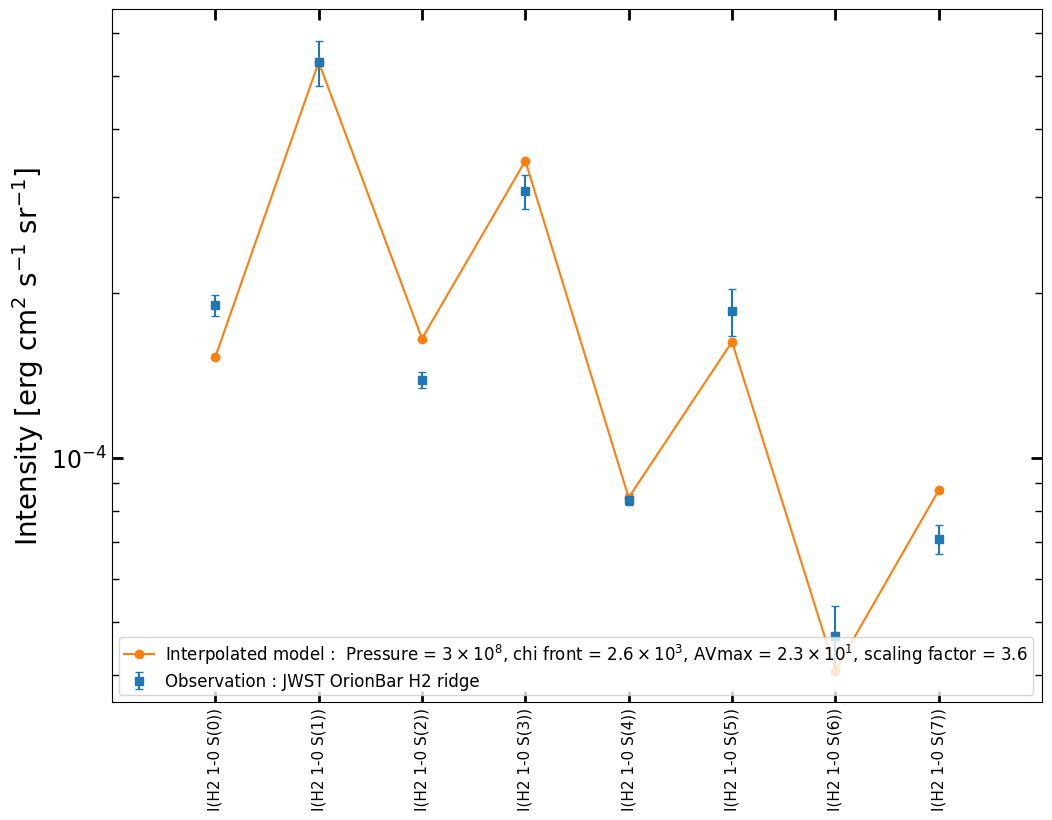

In [8]:
# we can now plot the comparison of the best model with the observation
ism.viz_tools.plot_intensity_diagram([JWST_OrionBar_PDR_obs,best_model],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")
plt.show()

# V - Investigate around the best model

Looking only at the best model is not sufficient. There might be an extended region of the parameter space where the model gives a similarly good fit, in which case the specific parameter value of the best models are not really more likely than any other values in this region. You can visualize the value of the $\chi^2$ across 2D cuts in the parameter space around the best model (note that these are cuts of the $\chi^2$ landscape, they do not correspond to the marginal likelyhood):

  0%|          | 0/16 [00:00<?, ?it/s]

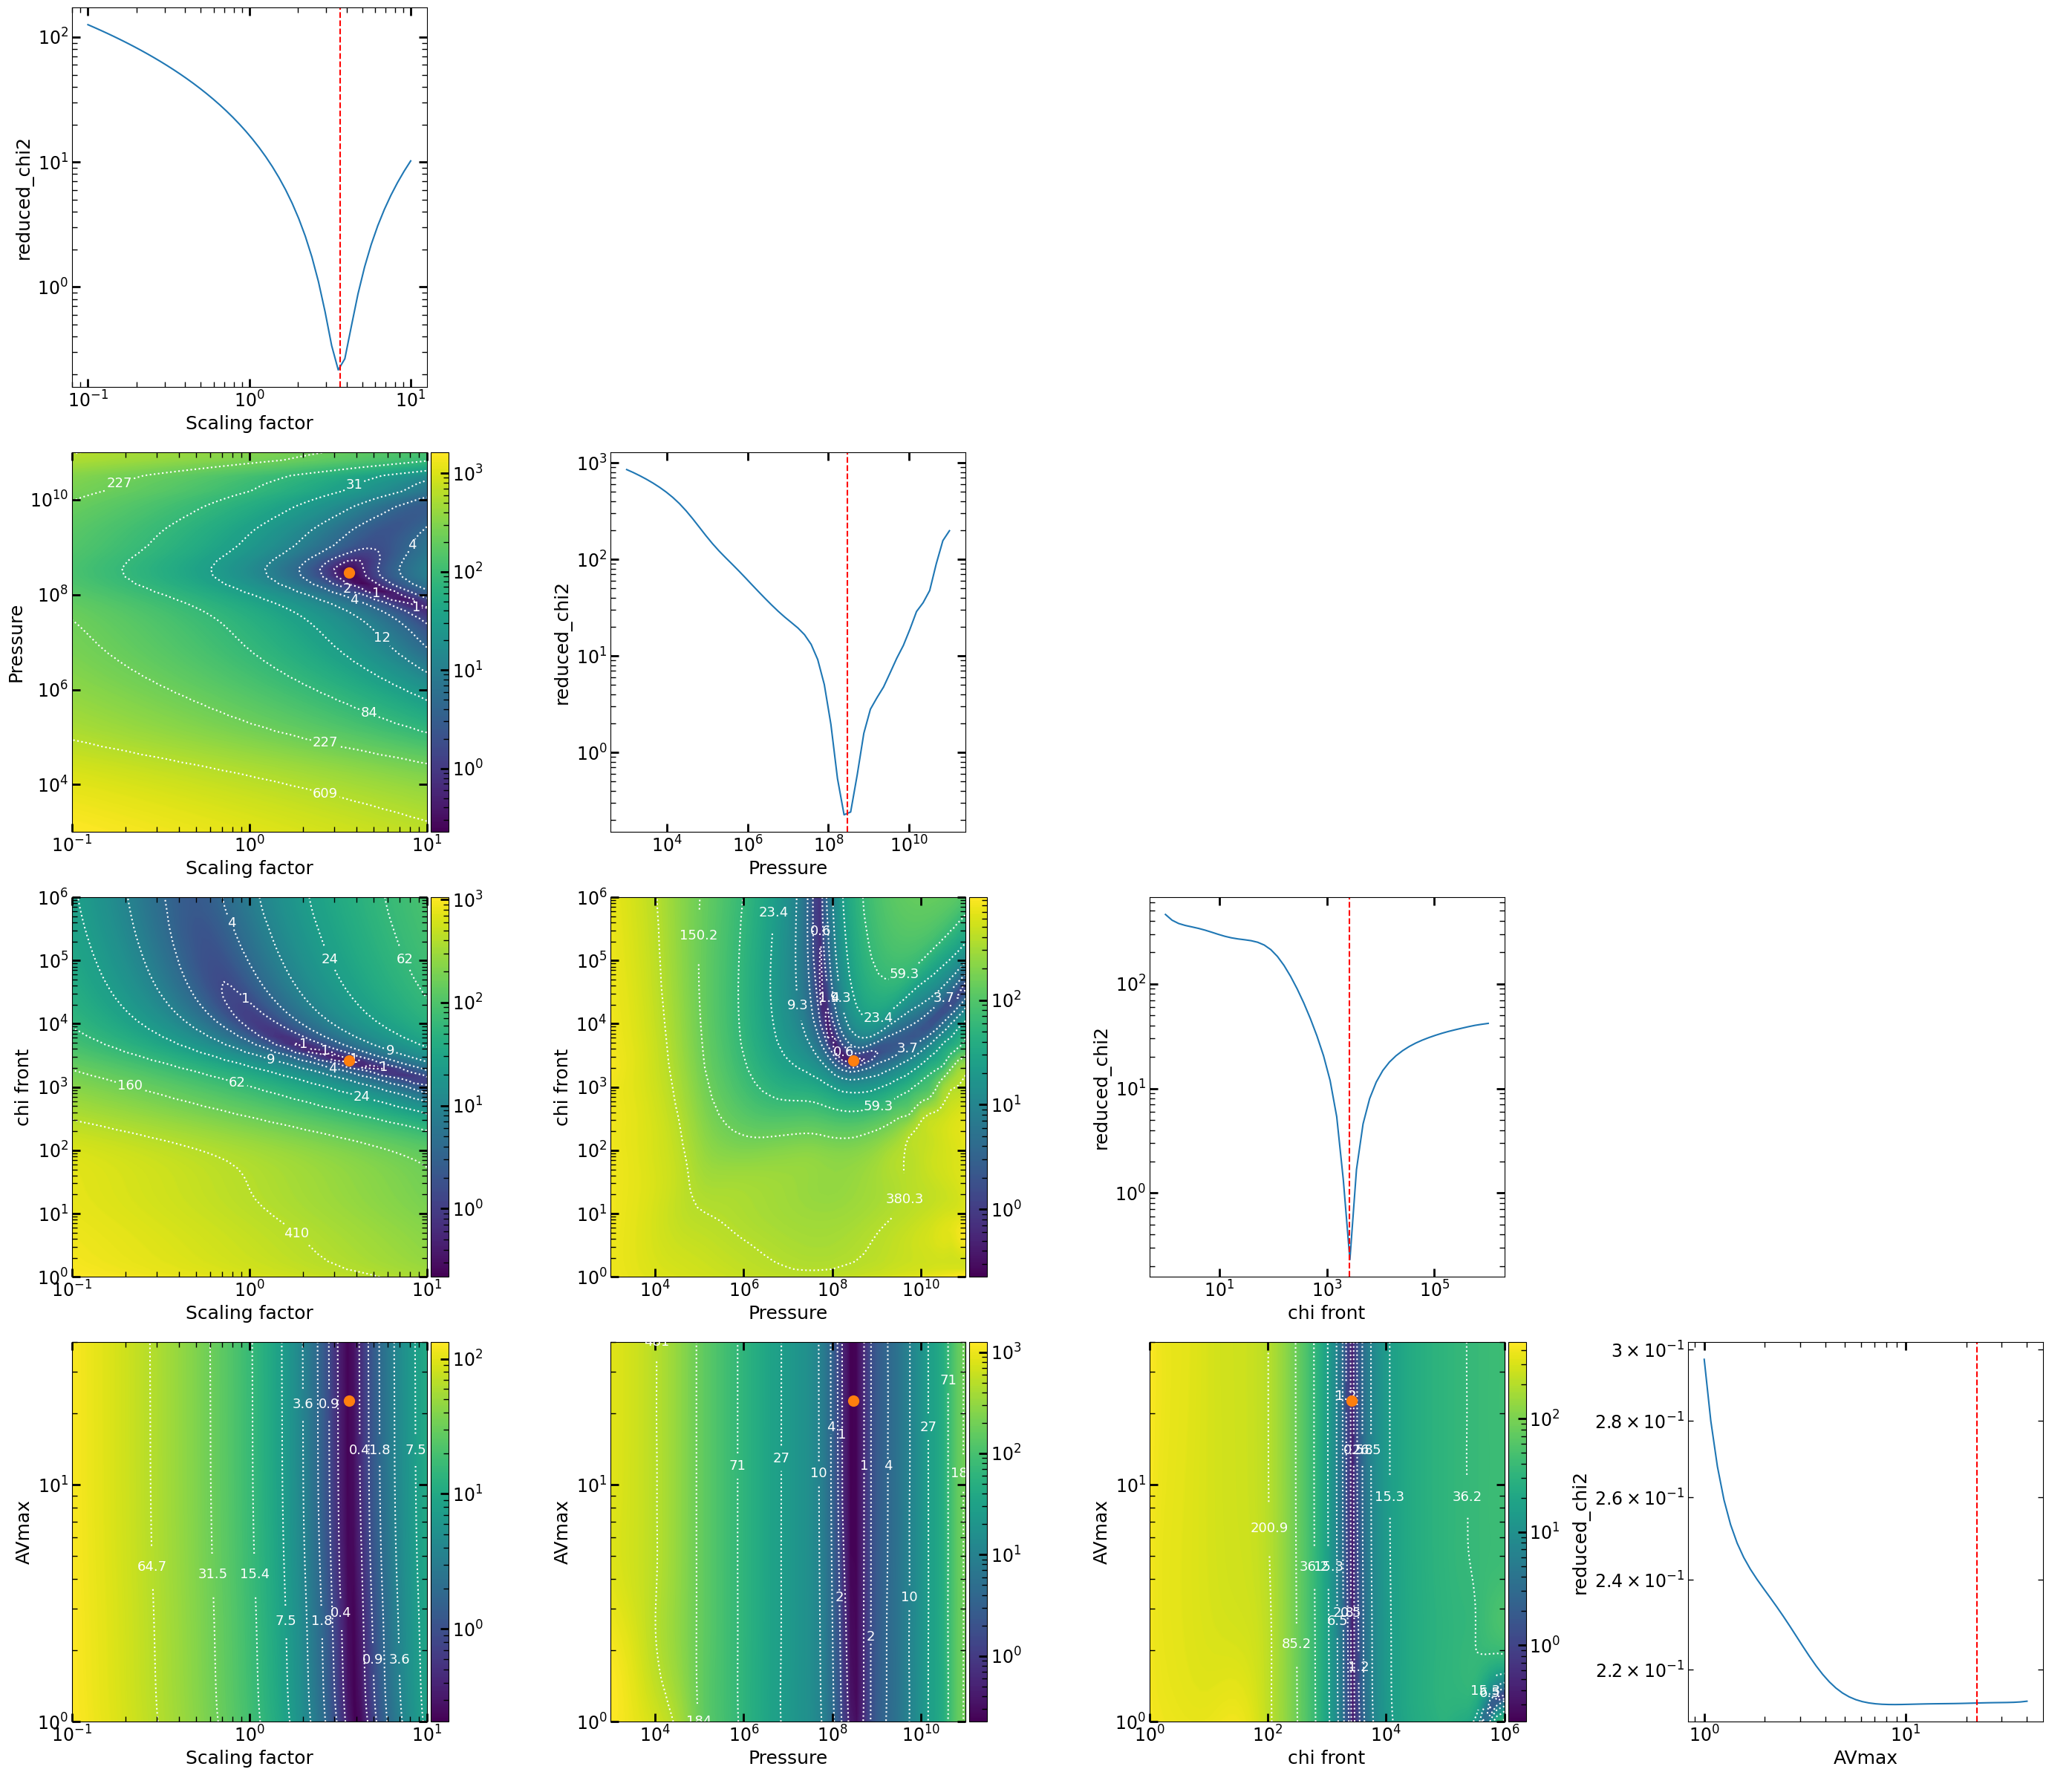

In [9]:
ism.viz_tools.fit_quality_contour_plots(my_approximator,JWST_OrionBar_PDR_obs2,best_model)
plt.show()

# we can save the figure to disk if necessary
#plt.savefig("test_chi2_contour_plots.pdf")

For instance we can see here that the total $A_V$ of the cloud is not constrained at all. The region of the best fit is also somewhat extended in the Pressure - chi front plane, where models with slighly lower pressure but higher radiation field perform similarly well.

One can easily check what the model predictions would be for another point in the region of low $\chi^2$:

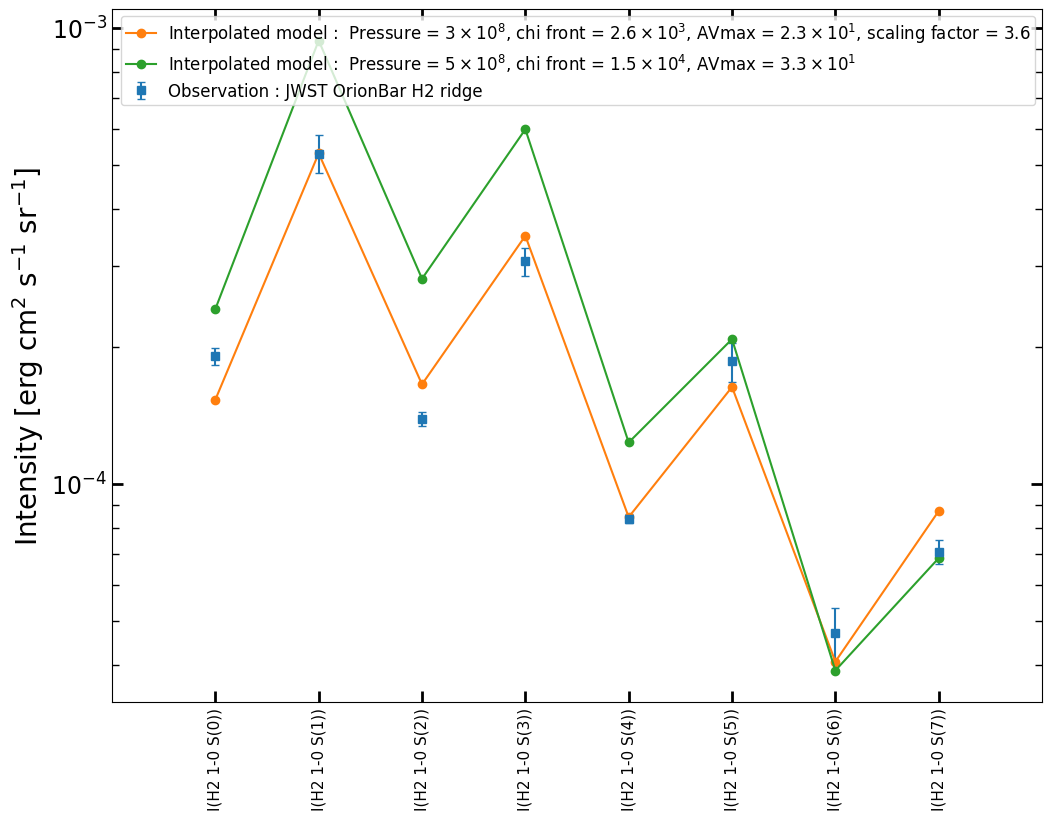

In [10]:
new_Model = my_approximator([5.0E8,1.49E+04,3.33E+01])
ism.viz_tools.plot_intensity_diagram([JWST_OrionBar_PDR_obs,best_model,new_Model],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")
plt.show()

# VI - MCMC caracterization of the uncertainties

However, $\chi^2$ maps in 2D cuts of the parameter space only provide a very incomplete vizualisation of the $\chi^2$ landscape and of the uncertainties.

For a more complete view, MCMC sampling in a Bayesian approach provides a more complete view. The functions below use a log-uniform prior on the physical parameters (on the cube defined by the model grid) and a uniform prior on the scaling factor (on the interval [0.1,10] by default).


In [ ]:
# The pyismtools.mcmc_uncertainties needs to be imported explicitly (contrary to all other submodules that are imported automatically)
import pyismtools.mcmc_uncertainties

# Sample the posterior distribution of the model parameter after seeing the observations :
sampling_result, posterior_predictions = ism.mcmc_uncertainties.sample_posterior(JWST_OrionBar_PDR_obs,my_approximator,best_model,nsamples=10000)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Multiprocess sampling (3 chains in 4 jobs)
CompoundStep
>Slice: [scaling_factor]
>Slice: [LogParameters]
Could not pickle model, sampling singlethreaded.
Sequential sampling (3 chains in 1 job)
CompoundStep
>Slice: [scaling_factor]
>Slice: [LogParameters]


Output()

Output()

Output()

Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 436 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [Observables]


Output()

To verify that the posterior has been adequately sampled, we can compare the posterior distributions of the 3 separate Markov chains, and visualize the trace of the Markov chains.

In [ ]:
ism.mcmc_uncertainties.diagnostic_figure(sampling_result)

As a more quantitative check, one can check the Gelman-Rubin statistics ("r_hat"):

In [ ]:
import arviz as az
az.summary(sampling_result, round_to=2)

We can then look at the resulting posterior distribution on the parameters, either individually :

In [ ]:
ism.mcmc_uncertainties.plot_posterior(sampling_result)

or by pairs :

In [ ]:
ism.mcmc_uncertainties.plot_pair_posterior(sampling_result)